In [1]:
from transformers import AutoTokenizer, BertForMaskedLM, BertTokenizer, AutoModelForMaskedLM
import torch
# device = "cuda:2"
# model = BertForMaskedLM.from_pretrained("result2/checkpoint-10000")

/data/seongilpark/.conda/envs/exp/lib/python3.10/site-packages/transformers/utils/hub.py:127: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


In [2]:
tokenizer = BertTokenizer.from_pretrained("final-clean-vocab.txt")

/data/seongilpark/.conda/envs/exp/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2185: FutureWarning: Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated and won't be possible anymore in v5. Use a model identifier or the path to a directory instead.
  warnings.warn(


In [3]:
tokenizer.tokenize("博")

['[UNK]']

In [6]:
text = "우리 나라의 수도는 [MASK]이다."
eng_text = "The capital of Korea is [MASK][MASK]."

In [7]:
inputs = tokenizer(text, return_tensors="pt")
tokenizer.tokenize(text)

['우리', '나라의', '수도', '##는', '[MASK]', '이다', '.']

In [140]:
inputs = tokenizer(text, return_tensors="pt")
tokenizer.tokenize(text)

['우리나라의', '수도', '##는', '[MASK]', '이다', '.']

In [130]:
inputs = tokenizer(text, return_tensors="pt")
tokenizer.tokenize(eng_text)

['the', 'cap', '##it', '##al', 'of', 'korea', 'is', '[MASK]', '[MASK]', '.']

In [80]:
tokenizer.mask_token_id

4

In [81]:
inputs

{'input_ids': tensor([[    2,  9562,    71, 10422,  7436,  7173,  9676,    79, 24552, 15113,
             4,     4,    18,     3]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [82]:
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits

In [83]:
maksed_index = inputs["input_ids"][0].tolist().index(tokenizer.mask_token_id)

In [86]:
maksed_index

10

In [85]:
tokenizer.decode(logits[0, maksed_index].topk(5).indices)

'##ᅡᅵᆫᅳᄋ'

In [1]:
'ع'.isalnum()

True

In [2]:
import re
pattern = re.compile(r'<[^>]*>')

def remove_tags(input_string):
    cleaned_string = pattern.sub('', input_string)
    return cleaned_string

In [3]:
remove_tags("dioagij<a>")

'dioagij'

In [6]:
"1".isalnum()

True

In [8]:
from datasets import load_from_disk
from tqdm.auto import tqdm
dataset = load_from_disk("corpus")["train"].shuffle(seed=42)
dataset = dataset.select(range(int(len(dataset)*0.1)))
texts = dataset["text"]
output = []

In [12]:
for text in tqdm(texts):
    for char in text:
        if not (char.isalnum() or char.isspace()):
            output.append(char)

  0%|          | 0/7317164 [00:00<?, ?it/s]

In [14]:
len(output)

152488489

In [15]:
from collections import Counter
counter = Counter(output)

In [20]:
commons = counter.most_common(100)

In [22]:
top100 = [char for char, _ in commons]

In [23]:
print(top100)

['.', ',', ')', '(', "'", '>', '<', '"', '·', '-', ':', '?', '’', '‘', '%', '“', '○', '”', '/', '!', '=', '~', ';', '…', '&', ']', '[', '*', '「', '」', '#', '□', '▲', '©', '|', '△', '@', '【', '】', '_', '+', '․', '→', '』', '『', '‧', '∼', '•', '◇', '㎡', '※', '', '《', '》', 'ⓒ', '◦', '・', '{', '◎', '〈', '〉', '▶', '；', '㈜', '\\', '㎞', '■', '×', '`', '–', '─', '∙', '❍', '━', '。', '◆', '㎝', '°', '▪', '}', '㎜', '\u200b', '●', '％', '★', '$', '℃', '｣', '｢', '≫', '―', '^', '▷', '≪', '☞', '↑', '▸', '☆', '◈', '▢']


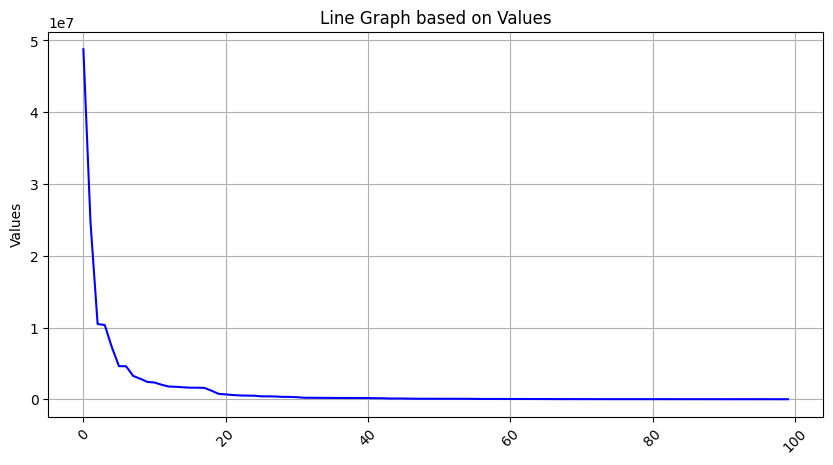

In [21]:
import matplotlib.pyplot as plt

x_labels = [item[0] for item in commons]
y_values = [item[1] for item in commons]

# 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(y_values, linestyle='-', color='b')
plt.ylabel('Values')
plt.title('Line Graph based on Values')
plt.grid(True)
# x 축 레이블 회전
plt.xticks(rotation=45)
plt.show()

In [24]:
import unicodedata
unicodedata.name("ú")

'LATIN SMALL LETTER U WITH ACUTE'

In [26]:
def remove_email_and_attached_text(input_string):
    # 정규 표현식을 사용하여 이메일 패턴을 찾고 제거합니다.
    cleaned_string = re.sub(r'\S+@\S+\.\S+', '', input_string)
    # 앞뒤 공백 제거
    cleaned_string = cleaned_string.strip()
    return cleaned_string

# 예제 문자열
example_string = "lkh2011@(이메일) 이렇게 있을 때, 이메일하고 붙어 있는 모든 글자를 삭제하려면 어떻게 해"

# 함수 호출
cleaned_string = remove_email_and_attached_text(example_string)

print(cleaned_string)

lkh2011@(이메일) 이렇게 있을 때, 이메일하고 붙어 있는 모든 글자를 삭제하려면 어떻게 해


In [30]:
import re



def remove_email_and_attached_text(input_string):
    # 이메일 패턴을 찾고 제거하는 정규 표현식
    cleaned_string = pattern.sub('', input_string)
    # 앞뒤 공백 제거
    cleaned_string = cleaned_string.strip()
    return cleaned_string

# 예제 문자열
example_string = ". 한 시중은행 관계자는 '저금리 기조로 인해 이자 수익이 줄어든 만큼 올해 모든 은행들은 비이자 수익을 강화할 수 밖에 없는 상황'이라며 '자산관리 적용 기준을 완화하고 증권, 보험 등을 포함한 폭넓은 서비스를 제공해야만 초반 wm 선점 경쟁에서 우위를 점할 수 있을 것'이라고 말했다. lkh2011@(이메일) 유후"

# 함수 호출
cleaned_string = remove_email_and_attached_text(example_string)

print(cleaned_string)

. 한 시중은행 관계자는 '저금리 기조로 인해 이자 수익이 줄어든 만큼 올해 모든 은행들은 비이자 수익을 강화할 수 밖에 없는 상황'이라며 '자산관리 적용 기준을 완화하고 증권, 보험 등을 포함한 폭넓은 서비스를 제공해야만 초반 wm 선점 경쟁에서 우위를 점할 수 있을 것'이라고 말했다.  유후


In [32]:
import re

def remove_specific_email_pattern(input_string):
    # 정규 표현식을 사용하여 특정 패턴(~@(이메일))을 찾고 제거합니다.
    cleaned_string = re.sub(r'\S+@\(\S*이메일\S*\)', '', input_string)
    # 앞뒤 공백 제거
    cleaned_string = cleaned_string.strip()
    return cleaned_string

# 예제 문자열
example_string = "lkh2011@naver.com 이렇게 있을 때, 이메일하고 붙어 있는 모든 글자를 삭제하려면 어떻게 해"

# 함수 호출
cleaned_string = remove_specific_email_pattern(example_string)

print(cleaned_string)

lkh2011@naver.com 이렇게 있을 때, 이메일하고 붙어 있는 모든 글자를 삭제하려면 어떻게 해
